In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from src.ego_group_partition import EgoGroupPartition
from src.ego_cluster import EgoCluster
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "./dataset/socfb-Cornell5.mtx"
df_graph = pd.read_table(path, skiprows=1, names = ["source", "target"], sep=" ")
graph = nx.from_pandas_edgelist(df_graph)

degree = list(dict(nx.degree(graph)).values())
print(f"num of nodes : {graph.number_of_nodes()}, num of edges : {graph.number_of_edges()}, avg degree : {np.mean(degree)}")

num of nodes : 18660, num of edges : 790777, avg degree : 84.75637727759914


In [6]:
ego_cluster = EgoCluster(graph.copy(), loss_rates_threshold=0.75, num_bins=500)
ego_cluster.clustering()
ego_cluster.random()
print("number of selected egos :",len(ego_cluster._ego_clusters.keys()))
ego_ratio = len(ego_cluster._ego_clusters.keys()) / graph.number_of_nodes()
print(f"ego ratio : {ego_ratio}")

number of selected egos : 480
ego ratio : 0.02572347266881029


In [7]:
egp1 = EgoGroupPartition(graph.copy(), ego_ratio=ego_ratio, threshold=0)
egp1.partition()
egp2 = EgoGroupPartition(graph.copy(), ego_ratio=ego_ratio, threshold=0.2)
egp2.partition()
egp3 = EgoGroupPartition(graph.copy(), ego_ratio=ego_ratio, threshold=0.5)
egp3.partition()

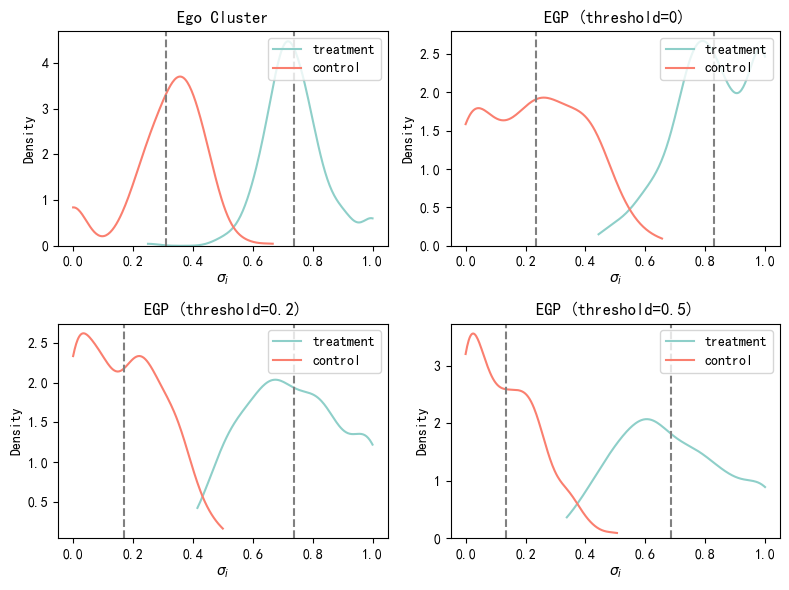

In [8]:
color1 = "#8ECFC9"
color2 = "#FA7F6F"

plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
data = [ego_cluster.graph.nodes[ego]["treated_neighbor_ratio"] for ego in ego_cluster._ego_clusters.keys() if ego_cluster.graph.nodes[ego]["z"] == 1]
sns.kdeplot(data, fill=False, color=color1, label='treatment', cut=0)
plt.axvline(np.mean(data), color='gray', linestyle='--')
data = [ego_cluster.graph.nodes[ego]["treated_neighbor_ratio"] for ego in ego_cluster._ego_clusters.keys() if ego_cluster.graph.nodes[ego]["z"] == 0]
sns.kdeplot(data, fill=False, color=color2, label='control', cut=0)
plt.axvline(np.mean(data), color='gray', linestyle='--')
plt.title('Ego Cluster')
plt.xlabel("$\sigma_i$")
plt.legend(loc='upper right')
plt.tight_layout() 

plt.subplot(2,2,2)
data = [egp1.graph.nodes[ego]["treated_neighbor_ratio"] for ego in egp1.graph.nodes if egp1.graph.nodes[ego]["z"] == 1 and egp1.graph.nodes[ego]["is_ego"] == 1]
sns.kdeplot(data, fill=False, color=color1, label='treatment', cut=0)
plt.axvline(np.mean(data), color='gray', linestyle='--')
data = [egp1.graph.nodes[ego]["treated_neighbor_ratio"] for ego in egp1.graph.nodes if egp1.graph.nodes[ego]["z"] == 0 and egp1.graph.nodes[ego]["is_ego"] == 1]
sns.kdeplot(data, fill=False, color=color2, label='control', cut=0)
plt.axvline(np.mean(data), color='gray', linestyle='--')
plt.title('EGP (threshold=0)')
plt.xlabel("$\sigma_i$")
plt.legend(loc='upper right')
plt.tight_layout() 

plt.subplot(2,2,3)
data = [egp2.graph.nodes[ego]["treated_neighbor_ratio"] for ego in egp2.graph.nodes if egp2.graph.nodes[ego]["z"] == 1 and egp2.graph.nodes[ego]["is_ego"] == 1]
sns.kdeplot(data, fill=False, color=color1, label='treatment', cut=0)
plt.axvline(np.mean(data), color='gray', linestyle='--')
data = [egp2.graph.nodes[ego]["treated_neighbor_ratio"] for ego in egp2.graph.nodes if egp2.graph.nodes[ego]["z"] == 0 and egp2.graph.nodes[ego]["is_ego"] == 1]
sns.kdeplot(data, fill=False, color=color2, label='control', cut=0)
plt.axvline(np.mean(data), color='gray', linestyle='--')
plt.title('EGP (threshold=0.2)')
plt.xlabel("$\sigma_i$")
plt.legend(loc='upper right')
plt.tight_layout()

plt.subplot(2,2,4)
data = [egp3.graph.nodes[ego]["treated_neighbor_ratio"] for ego in egp3.graph.nodes if egp3.graph.nodes[ego]["z"] == 1 and egp3.graph.nodes[ego]["is_ego"] == 1]
sns.kdeplot(data, fill=False, color=color1, label='treatment', cut=0)
plt.axvline(np.mean(data), color='gray', linestyle='--')
data = [egp3.graph.nodes[ego]["treated_neighbor_ratio"] for ego in egp3.graph.nodes if egp3.graph.nodes[ego]["z"] == 0 and egp3.graph.nodes[ego]["is_ego"] == 1]
sns.kdeplot(data, fill=False, color=color2, label='control', cut=0)
plt.axvline(np.mean(data), color='gray', linestyle='--')
plt.title('EGP (threshold=0.5)')
plt.xlabel("$\sigma_i$")
plt.legend(loc='upper right')
plt.tight_layout() 
plt.savefig("./plots/sigma_2.pdf")
plt.show()